In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
 
from zipfile import ZipFile
%matplotlib inline

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from matplotlib.image import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
#os.makedirs(r'/content/gdrive/My Drive/Deep Learning/Datasets/')
os.chdir(r'/content/gdrive/My Drive/Deep Learning/Datasets/')

In [ ]:
%%time
file_name = "/content/gdrive/My Drive/Deep Learning/Datasets/cell_images.zip"
 
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done Extracting...")

Done Extracting...
CPU times: user 7.31 s, sys: 4.63 s, total: 11.9 s
Wall time: 6min 59s


In [ ]:
os.listdir(r"/content/gdrive/My Drive/Deep Learning/Datasets/cell_images/")

['cell_images', 'test', 'train']

In [ ]:
img_dir = r"/content/gdrive/My Drive/Deep Learning/Datasets/cell_images/"

In [ ]:
train_path = r"/content/gdrive/My Drive/Deep Learning/Datasets/cell_images/train"
test_path = r"/content/gdrive/My Drive/Deep Learning/Datasets/cell_images/test"

In [ ]:
my_train_img_dir = img_dir + "/train"
my_test_img_dir = img_dir + "/test"
 
print(os.listdir(my_train_img_dir))
print(os.listdir(my_test_img_dir))

['parasitized', 'uninfected']
['parasitized', 'uninfected']


In [ ]:
 print(os.listdir(train_path))
print(os.listdir(test_path))

['parasitized', 'uninfected']
['parasitized', 'uninfected']


In [ ]:
categories = ['parasitized', 'uninfected']

### Single Image Processing

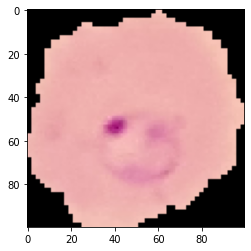

In [ ]:
for category in categories:
    path = os.path.join(train_path,category)
    class_num = categories.index(category)
    
    for img in os.listdir(path):
        img_array = load_img(os.path.join(path,img), target_size=(100,100))
        new_array = img_to_array(img_array)
        plt.imshow(array_to_img(new_array))
        plt.show()
        break
    break

### Batches of Image

In [ ]:
training_data = []
test_data = []
 
def create_training_data(directory,categories, data):
    for category in categories:
        path = os.path.join(directory,category)
        class_num = categories.index(category)
        
        for img in os.listdir(path):
            try:
                img_array = load_img(os.path.join(path,img), target_size=(100,100))
                new_array = img_to_array(img_array)
                data.append([new_array, class_num])
            except Exception as e:
                pass

In [ ]:
%%time
create_training_data(directory= train_path,
                     categories=categories, data=training_data)
create_training_data(directory= test_path, categories= categories,
                    data=test_data)

CPU times: user 25.9 s, sys: 2.9 s, total: 28.8 s
Wall time: 46.4 s


In [ ]:
print(len(training_data))
print(len(test_data))

24958
2600


In [ ]:
import random
 
random.shuffle([training_data, test_data])

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []

In [ ]:
def get_features_and_labels(data, features, labels):
    for feature, label in data:
        features.append(feature)
        labels.append(label)
    return features, labels

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,y_train = get_features_and_labels(training_data,X_train,y_train)
 
X_test,y_test = get_features_and_labels(test_data,X_test,y_test)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
print(len(X_train), len(y_train))
print(len(X_valid), len(y_valid))
print(len(X_test), len(y_test))

17470 17470
7488 7488
2600 2600


In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_valid = np.array(X_valid)
 
y_train = np.array(y_train)
y_test = np.array(y_test)
y_valid = np.array(y_valid)

In [ ]:
print(type(X_train), type(X_test), type(X_valid),
      type(y_train), type(y_test), type(y_valid))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


Text(0.5, 1.0, 'parasitized')

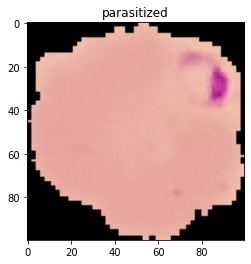

In [ ]:
plt.imshow(array_to_img(X_train[596]))
plt.title(categories[y_train[596]])

In [ ]:
def rescale(data):
    
    data = data/data.max()
    
    return data

In [ ]:
X_train = rescale(X_train)
X_test = rescale(X_test)
X_valid = rescale(X_valid)

In [ ]:
print(X_train[245].max(), X_train[632].min(),
      X_test[34].max(), X_test[32].min(),
      X_valid[135].max(), X_valid[144].min())

0.8862745 0.0 0.8862745 0.0 0.84705883 0.0


In [ ]:
X_train.shape

(17470, 100, 100, 3)

In [ ]:
model = Sequential()
 
model.add(Conv2D(filters = 32,kernel_size=[2,2], padding = 'same',
                 input_shape = (100,100,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters = 64,kernel_size=[2,2], padding = 'same',
                 input_shape = (100,100,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters = 72,kernel_size=[5,5], padding = 'same',
                 input_shape = (100,100,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters = 96,kernel_size=[7,7], padding = 'same',
                 input_shape = (100,100,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Flatten())
 
model.add(Dense(units=128, activation='relu', input_shape=(100,100,3)))
model.add(Dropout(0.4))
 
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
 
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics =['accuracy'])
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 72)        115272    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 72)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 96)        3

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode = "min",
                           patience=5)
 
checkpoint = ModelCheckpoint(filepath="weights.{epoch:02d}-{val_loss:.2f}.hdf5",
                             monitor='val_loss', mode = "min", save_best_only=True)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_valid,y_valid),
         callbacks=[early_stop,checkpoint], batch_size=16, epochs=25, verbose=1)

Epoch 1/25
1092/1092 [==============================] - 10s 9ms/step - loss: 0.3400 - accuracy: 0.8294 - val_loss: 0.1624 - val_accuracy: 0.9510
Epoch 2/25
1092/1092 [==============================] - 10s 9ms/step - loss: 0.1484 - accuracy: 0.9549 - val_loss: 0.1358 - val_accuracy: 0.9527
Epoch 3/25
1092/1092 [==============================] - 10s 9ms/step - loss: 0.1346 - accuracy: 0.9581 - val_loss: 0.1387 - val_accuracy: 0.9533
Epoch 4/25
1092/1092 [==============================] - 10s 9ms/step - loss: 0.1251 - accuracy: 0.9603 - val_loss: 0.1425 - val_accuracy: 0.9566
Epoch 5/25
1092/1092 [==============================] - 10s 9ms/step - loss: 0.1181 - accuracy: 0.9624 - val_loss: 0.1200 - val_accuracy: 0.9583
Epoch 6/25
1092/1092 [==============================] - 10s 9ms/step - loss: 0.1110 - accuracy: 0.9635 - val_loss: 0.1287 - val_accuracy: 0.9625
Epoch 7/25
1092/1092 [==============================] - 10s 9ms/step - loss: 0.1070 - accuracy: 0.9653 - val_loss: 0.1185 - val_ac

In [ ]:
model.save("cell_images.h5")

In [ ]:
losses = pd.DataFrame(model.history.history)

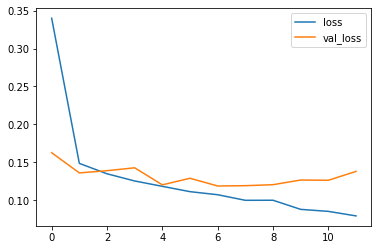

In [ ]:
losses[['loss', 'val_loss']].plot()

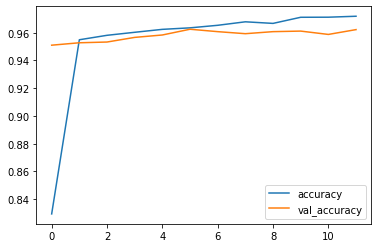

In [ ]:
losses[['accuracy', 'val_accuracy']].plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
 print(confusion_matrix(y_test, test_pred))

[[1220   80]
 [  33 1267]]


In [ ]:
predictions = model.predict_classes(X_valid)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(classification_report(y_valid,predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3767
           1       0.95      0.97      0.96      3721

    accuracy                           0.96      7488
   macro avg       0.96      0.96      0.96      7488
weighted avg       0.96      0.96      0.96      7488



In [ ]:
test_pred = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1300
           1       0.94      0.97      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



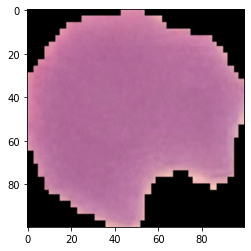

In [ ]:
#23, 96, 76, 7
#45, 33, 73, 85
 
single_img = X_test[100]
 
plt.imshow(array_to_img(single_img))

In [ ]:
pred = model.predict_classes(np.expand_dims(single_img,axis=0))

In [ ]:
for i in pred:
    for j in i:
        print(categories[j])

uninfected


# 96% Accuracy pretty good yh...
* 4 CNN layers... And MaxPool...
* Filter, Kernel size
× 32,     2,2
* 64,     2,2
* 72,     5,5
* 96 ,    7,7
 
* Dropout = 0.4
* Flatten
* 3 Dense Layers
* 128, 64, 1 neurons
 
## Note Conv2D and MaxPool2D for picture.
 
## the dataset is about cell images. infected/ parasitized or uninfected.
Our model, cell_images.h5 can predict this with 96% accuracy...